In [1]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Load the input_train_balanced dataset
input_train_balanced = pd.read_csv('intput_train_balanced.csv')
# Load the model
model = joblib.load('model.sav')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


summary plot showing the impact of each feature on model predictions.

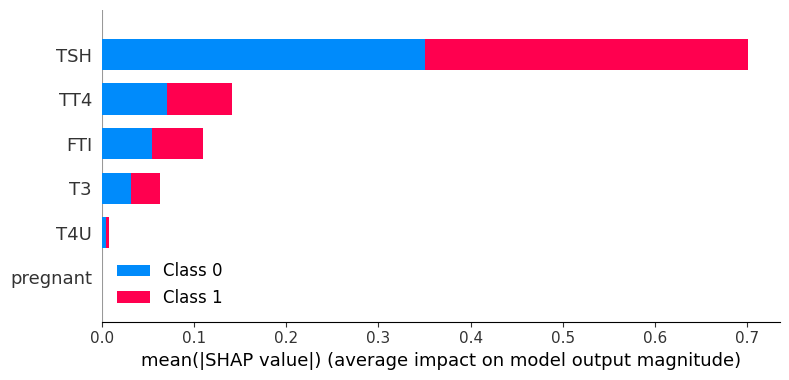

In [2]:
X_train = input_train_balanced.drop(['binaryClass'], axis=1)
# Create a SHAP explainer object

explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_train)


The color of each point represents the feature's value. Blue indicates lower feature values, while red indicates higher feature values. This allows you to see how the feature value influences the model's prediction.

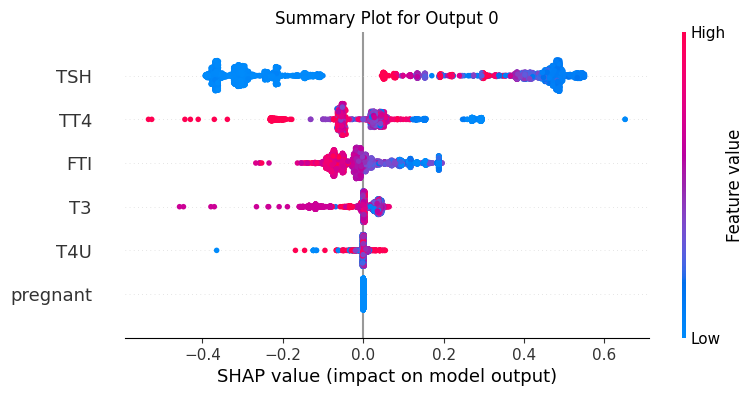

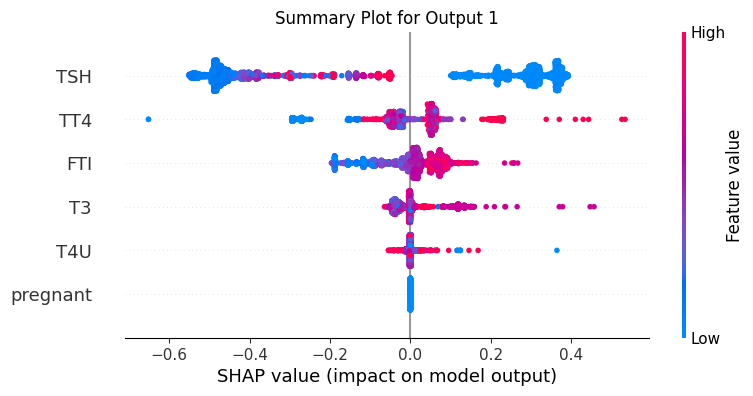

In [3]:

# Iterate over each output in shap_values
for i in range(len(shap_values)):
    # Create a summary plot for the current output
    shap.summary_plot(shap_values[i], X_train, feature_names=X_train.columns, show=False)
    plt.title(f'Summary Plot for Output {i}')
    plt.show()

# 0 : Hypo
# 1: Normal 


In [4]:
import lime
import lime.lime_tabular

y_train =input_train_balanced['binaryClass']
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, training_labels=y_train,  feature_names=X_train.columns, kernel_width=3, discretize_continuous=True, verbose=False)


In [5]:
predict_fn = lambda x: model.predict_proba(x)

In [22]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification',
class_names=['Hypothyroidism', 'Normal'], training_labels=y_train, feature_names=X_train.columns)


In [40]:
input_train_balanced.head(-1)

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,124.0,112.0,1.80,6.200,1.11,0,0
1,80.0,79.0,2.10,8.200,1.01,0,0
2,17.0,14.0,0.40,165.000,1.19,0,0
3,46.0,46.0,2.60,31.000,1.00,0,0
4,14.0,13.0,0.70,60.000,1.11,0,0
...,...,...,...,...,...,...,...
4098,94.0,103.0,2.04,1.960,0.91,0,1
4099,164.0,201.0,3.10,3.100,0.81,0,1
4100,92.0,90.0,1.80,2.500,1.02,0,1
4101,112.0,134.0,2.04,0.045,0.83,0,1


In [41]:
i = 4098
input_train_balanced.iloc[i]

TT4             94.00
FTI            103.00
T3               2.04
TSH              1.96
T4U              0.91
pregnant         0.00
binaryClass      1.00
Name: 4098, dtype: float64

TT4          94.00
FTI         103.00
T3            2.04
TSH           1.96
T4U           0.91
pregnant      0.00
Name: 4098, dtype: float64 1


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


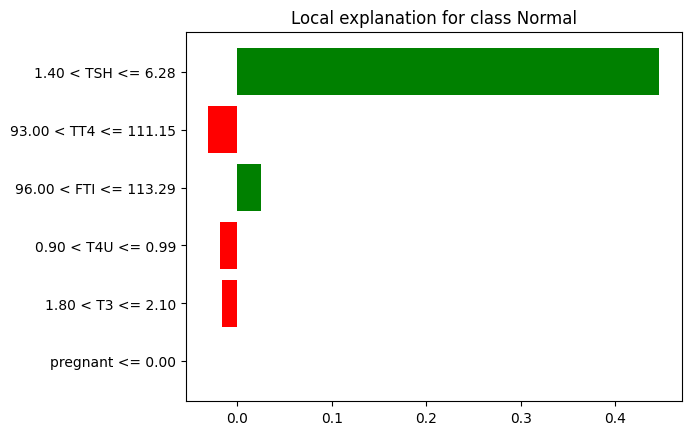

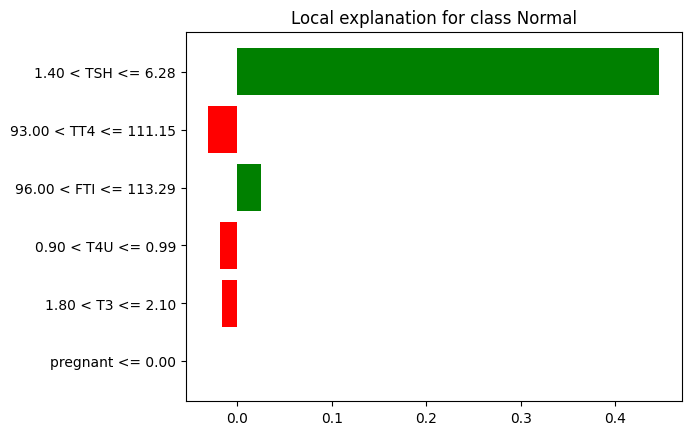

In [42]:
print(X_train.loc[i,X_train.columns], y_train.loc[i])
exp=explainer.explain_instance(X_train.loc[i].values, predict_fn)
# increse font size
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()